<a href="https://colab.research.google.com/github/ProYangerAndrey95/Data_Science/blob/master/%D0%9C%D0%9E%D0%98%20%D0%A0%D0%90%D0%91%D0%9E%D0%A2%D0%AB/Data_Science_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# подключение вспомогательных  библиотек
import pandas # - чтетиние и приобразование данных  
import matplotlib.pyplot as plt # - отображение графиков 
from sklearn.metrics import  mean_absolute_error # - нахождение ошибки модели
# подключение моделей для анализа данных
from sklearn.linear_model import LinearRegression # - модель линейной ригрессии
from sklearn.neighbors import  KNeighborsRegressor# - модель линейной ригрессии 
from sklearn.neural_network import MLPRegressor

In [0]:
usd_rate = pandas.read_excel('usd_rate.xlsx')
curs = usd_rate.curs
# формирование dataFrame
future = 7; past = 14; start = past;
end = len(curs) - future
raw_df = []
for day in range( start,end):
  slc = curs[(day-past):(day+future)]
  raw_df.append(list(slc))

past_columns = []
for i in range (past):
  past_columns.append(f"past_{i}")

future_columns = []
for i in range (future):
  future_columns.append(f"future_{i}")

df = pandas.DataFrame(data=raw_df, columns=(past_columns+future_columns))

In [0]:
# обучающая выборка(тренеровочная) "Учебник"
X = df[past_columns][:-1]
Y = df[future_columns][:-1]

In [0]:
# тестовая выборка(тренеровочная) "Экзамен"
X_test = df[past_columns][-1:]
Y_test = df[future_columns][-1:]

error = 0.5799058806552486


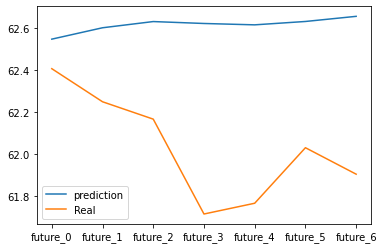

In [6]:
lr = LinearRegression()
lr.fit(X,Y)# обучение
prediction= lr.predict(X_test) # предсказание
plt.plot(prediction[0], label ='prediction')
plt.plot(Y_test.iloc[0], label='Real')
plt.legend()
error = mean_absolute_error(prediction[0],Y_test.iloc[0])
print(f"error = {error}")

error = 0.2128142857142856


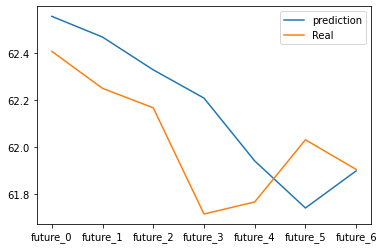

In [7]:

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(X,Y)
prediction = KNN.predict(X_test)
plt.plot(prediction[0], label ='prediction')
plt.plot(Y_test.iloc[0], label='Real')
plt.legend()
error = mean_absolute_error(prediction[0],Y_test.iloc[0])
print(f"error = {error}")

error = 0.6753958964069936


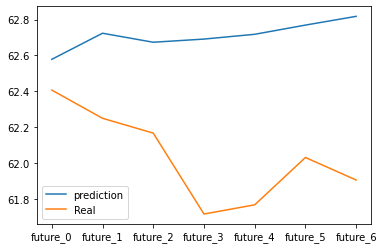

In [8]:
MLP = MLPRegressor(max_iter=500, hidden_layer_sizes=(400,200), random_state=42)
MLP.fit(X,Y)
prediction= MLP.predict(X_test)
plt.plot(prediction[0], label ='prediction')
plt.plot(Y_test.iloc[0], label='Real')
plt.legend()
error = mean_absolute_error(prediction[0],Y_test.iloc[0])
print(f"error = {error}")